# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
unit = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={unit}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | sitka
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | qaqortoq
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | labrador city
Processing Record 12 of Set 1 | nadi
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | port glaud
City not found. Skipping...
Processing Record 15 of Set 1 | ailuk
Processing Record 16 of Set 1 | sao fidelis
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | nar'yan-mar
Processing Record 19 of Set 1 | klyuchi
Processing Record 20 of Set 1 | uturoa
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 | iluliss

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,8.81,53,0,7.20,AR,1704674840
1,sitka,57.0531,-135.3300,4.94,52,100,8.75,US,1704674841
2,avarua,-21.2078,-159.7750,28.03,83,75,7.20,CK,1704674842
3,port alfred,-33.5906,26.8910,18.43,96,100,0.45,ZA,1704674843
4,grytviken,-54.2811,-36.5092,4.97,77,19,0.47,GS,1704674844


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,8.81,53,0,7.20,AR,1704674840
1,sitka,57.0531,-135.3300,4.94,52,100,8.75,US,1704674841
2,avarua,-21.2078,-159.7750,28.03,83,75,7.20,CK,1704674842
3,port alfred,-33.5906,26.8910,18.43,96,100,0.45,ZA,1704674843
4,grytviken,-54.2811,-36.5092,4.97,77,19,0.47,GS,1704674844


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

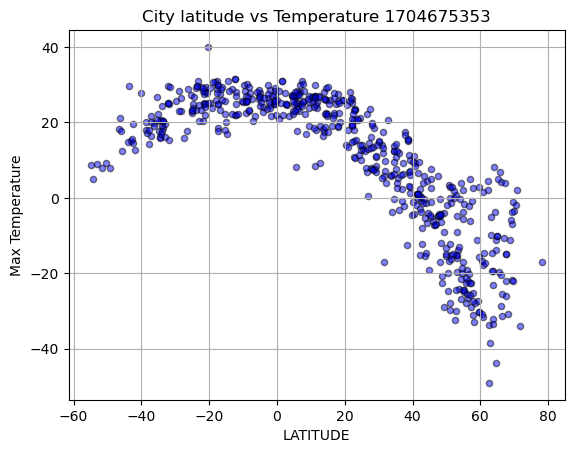

In [24]:
# Build scatter plot for latitude vs. temperature
todays_date = city_data_df["Date"].max()
Latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]
x_values = Latitude
y_values = temperature
plt.scatter(x_values,y_values, marker =".",color = "blue",s=80,alpha = 0.5,edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("LATITUDE")
plt.ylabel("Max Temperature")
plt.title(f"City latitude vs Temperature {todays_date}")
plt.grid()
plt.tight_layout

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

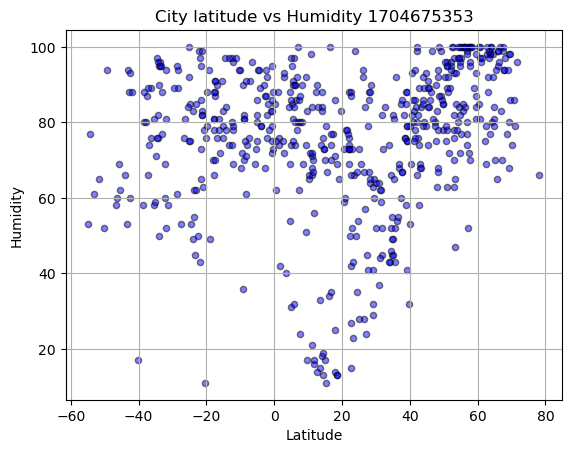

In [25]:
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values, marker =".",c="blue",s=80,alpha = 0.5,edgecolors = "black")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City latitude vs Humidity {todays_date}")
plt.grid()
plt.tight_layout

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

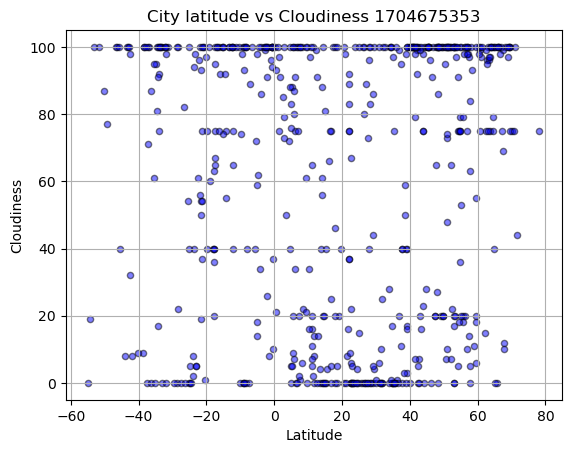

In [26]:
# Build the scatter plots for latitude vs. cloudiness
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values, marker =".",c="blue",s=80,alpha = 0.5,edgecolors = "black")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City latitude vs Cloudiness {todays_date}")
plt.grid()
plt.tight_layout

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

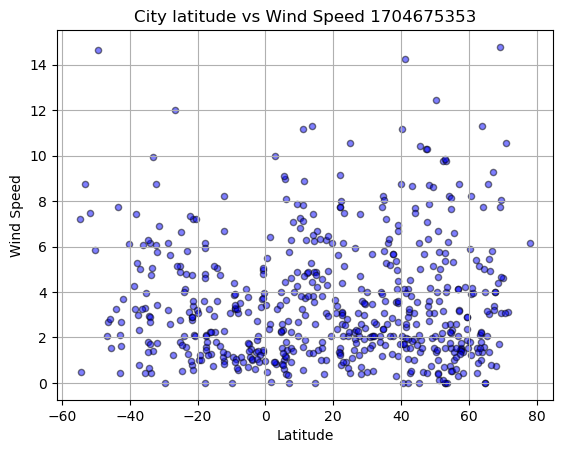

In [27]:
# Build the scatter plots for latitude vs. wind speed
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values, marker =".",c="blue",s=80,alpha = 0.5,edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City latitude vs Wind Speed {todays_date}")
plt.grid()
plt.tight_layout

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values,x_lineq_point,y_lineq_point):
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
    regress_values = x_values*slope + intercept
    line_eq = "y = "+ str(round(slope,2)) + "x  + " + str(round(intercept,2))
    plot = plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_lineq_point,y_lineq_point),fontsize=15,color = "red")
    print(f"the r value is :{rvalue}")
    plt.xlabel("Latitude")

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0),:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,sitka,57.0531,-135.3300,4.94,52,100,8.75,US,1704674841
5,qaqortoq,60.7167,-46.0333,1.49,97,99,3.91,GL,1704674845
10,labrador city,52.9463,-66.9114,-30.05,76,0,0.00,CA,1704674850
12,bilibino,68.0546,166.4372,-30.75,97,100,0.75,RU,1704674851
13,ailuk,10.2197,169.9797,26.66,65,34,7.27,MH,1704674853


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0),:]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,8.81,53,0,7.20,AR,1704674840
2,avarua,-21.2078,-159.7750,28.03,83,75,7.20,CK,1704674842
3,port alfred,-33.5906,26.8910,18.43,96,100,0.45,ZA,1704674843
4,grytviken,-54.2811,-36.5092,4.97,77,19,0.47,GS,1704674844
6,port-aux-francais,-49.3500,70.2167,8.03,94,77,14.64,TF,1704674846


###  Temperature vs. Latitude Linear Regression Plot

the r value is :-0.8619831201192597


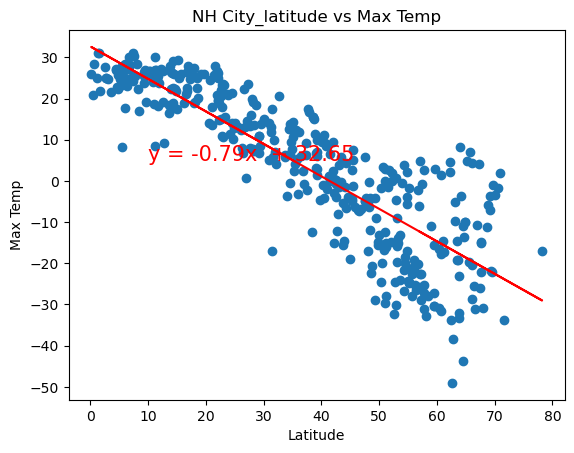

In [31]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_lineq_point = 10
y_lineq_point = 5

#applying the function
linearRegression(x_values,y_values,x_lineq_point,y_lineq_point)
plt.ylabel("Max Temp")
plt.title("NH City_latitude vs Max Temp")
plt.show()

the r value is :0.6180965018080694


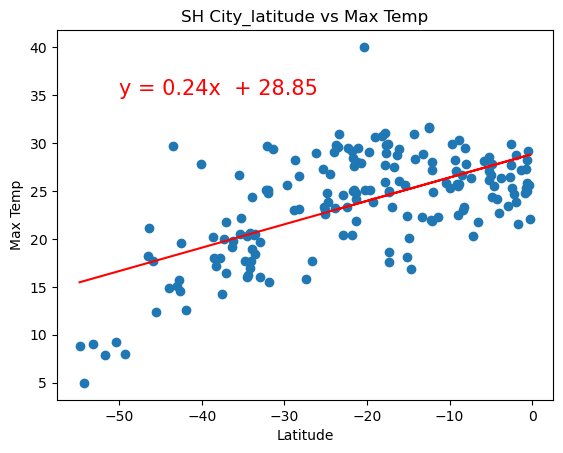

In [32]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_lineq_point = -50
y_lineq_point = 35
#applying the function
linearRegression(x_values,y_values,x_lineq_point,y_lineq_point)
plt.ylabel("Max Temp")
plt.title("SH City_latitude vs Max Temp")
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere the Max Temperature reduces with increase in latitude. So this means the Max Temperature and the latitude has a strong negative relationship. 

In the Southern hemisphere the temperature reduces with the latitude. This relationship is a strong positive relationship. 

### Humidity vs. Latitude Linear Regression Plot

the r value is :0.41533597091886126


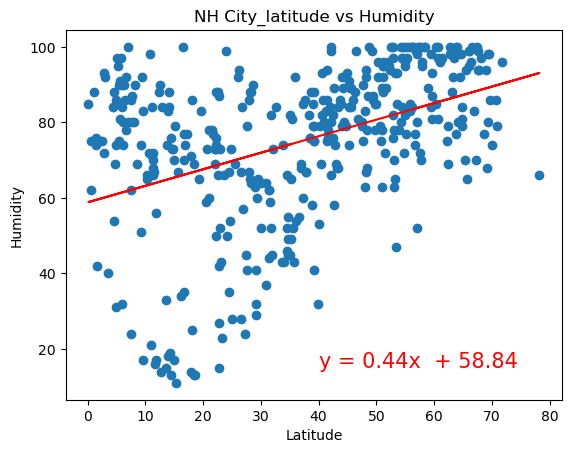

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_lineq_point = 40
y_lineq_point = 15
#applying the function
linearRegression(x_values,y_values,x_lineq_point,y_lineq_point)
plt.ylabel("Humidity")
plt.title("NH City_latitude vs Humidity")
plt.show()

the r value is :0.2248635447555044


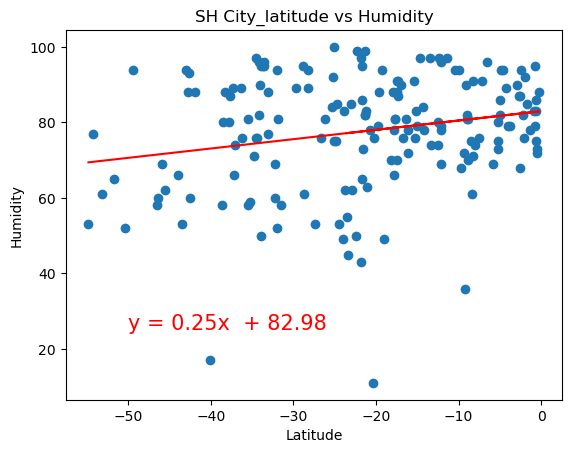

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
x_lineq_point = -50
y_lineq_point = 25
#applying the function
linearRegression(x_values,y_values,x_lineq_point,y_lineq_point)
plt.ylabel("Humidity")
plt.title("SH City_latitude vs Humidity")
plt.show()

**Discussion about the linear relationship:** The northen hemisphere cities seem to have a steeper slope meaning more they have a greater range and more cities with a higher humidity. In the Souther Hemisphere, the humidity seems to be greater near the equator. 

### Cloudiness vs. Latitude Linear Regression Plot

the r value is :0.2602008637757744


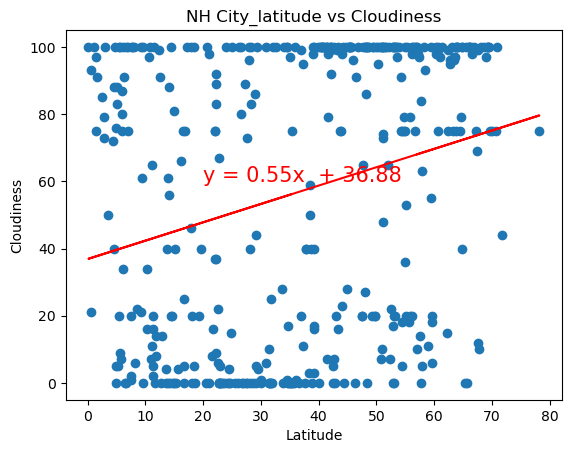

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_lineq_point = 20
y_lineq_point = 60
#applying the function
linearRegression(x_values,y_values,x_lineq_point,y_lineq_point)
plt.ylabel("Cloudiness")
plt.title("NH City_latitude vs Cloudiness")
plt.show()

the r value is :0.07531795580710929


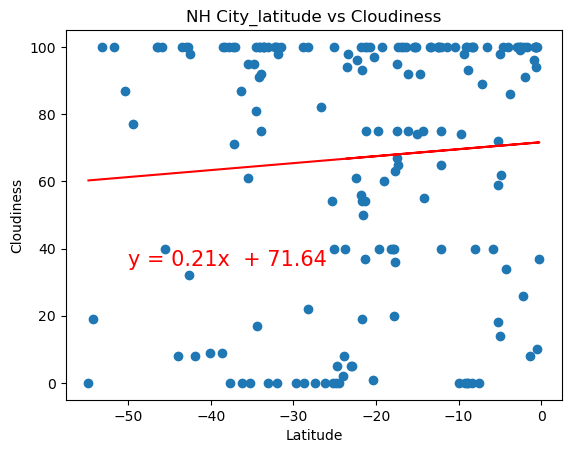

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_lineq_point = -50
y_lineq_point = 35
#applying the function
linearRegression(x_values,y_values,x_lineq_point,y_lineq_point)
plt.ylabel("Cloudiness")
plt.title("NH City_latitude vs Cloudiness")
plt.show()

**Discussion about the linear relationship:** The greater the latitude the city is located in the more cloudy the sky is. 

### Wind Speed vs. Latitude Linear Regression Plot

the r value is :0.016237754462984037


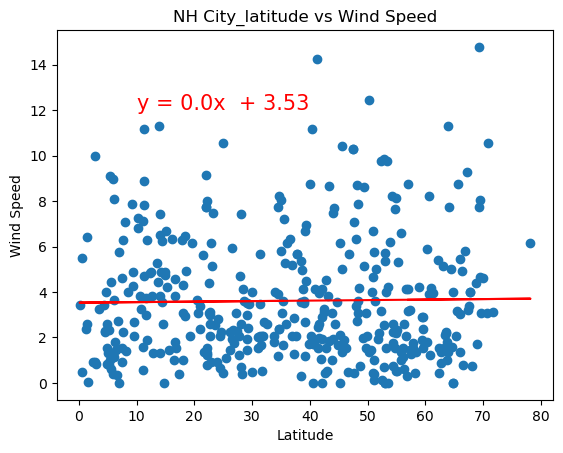

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_lineq_point = 10
y_lineq_point = 12
#applying the function
linearRegression(x_values,y_values,x_lineq_point,y_lineq_point)
plt.ylabel("Wind Speed")
plt.title("NH City_latitude vs Wind Speed")
plt.show()

the r value is :-0.32299190378443693


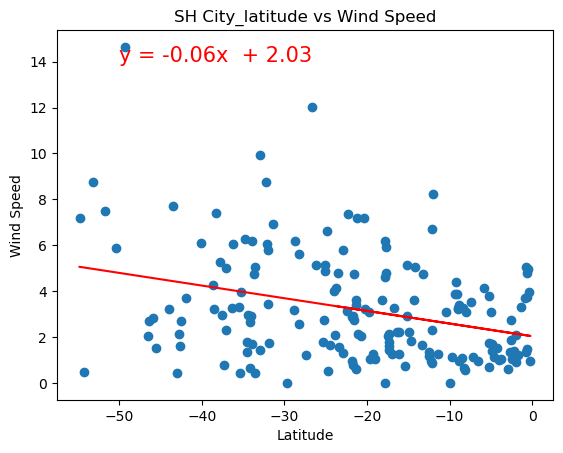

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_lineq_point = -50
y_lineq_point = 14
#applying the function
linearRegression(x_values,y_values,x_lineq_point,y_lineq_point)
plt.ylabel("Wind Speed")
plt.title("SH City_latitude vs Wind Speed")
plt.show()

**Discussion about the linear relationship:** The northern hemisphere wind speed is fairly constant with the ever so slight increase with latitude. The Souther Hemisphere windspeed decreases as the latitude increases closer to the equator. This is inferred based upon the slop of the lineear equations which are 0.0 and -0.06. There is no correlation between the cities latitude and windspeed since there are cities in all ranges with various wind speeds. 